In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
athletes = pd.read_csv('C:\\Users\\adefe\\Documents\\DataScienceProjects\\OnlineProjects\\Olympics 2021\\athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
athletes.shape

(271116, 15)

In [4]:
#description
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
#information
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
#Checking null values
nan_values = athletes.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [7]:
#NULL TOTAL
athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
#columns with null values
athletes[athletes.columns[athletes.isnull().any().tolist()]]

,Age,Height,Weight,Medal
0,24.0,180.0,80.0,NaN
1,23.0,170.0,60.0,NaN
2,24.0,NaN,NaN,NaN
3,34.0,NaN,NaN,Gold
4,21.0,185.0,82.0,NaN
...,...,...,...,...
271111,29.0,179.0,89.0,NaN
271112,27.0,176.0,59.0,NaN
271113,27.0,176.0,59.0,NaN
271114,30.0,185.0,96.0,NaN


In [9]:
#Nigeria Athletes
athletes.query('Team == "Nigeria"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
211,101,Adeyemi Abayomi,M,25.0,170.0,51.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Lightweight,NaN
544,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 100 metres,NaN
545,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
546,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN
547,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 4 x 100 metres Relay,NaN


In [10]:
#Ghana Athletes
athletes.query('Team == "Ghana"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
800,458,Felix Ahmed Aboagye,M,20.0,176.0,70.0,Ghana,GHA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,NaN
1189,667,"Benjamin ""Ben"" Acheampong",M,25.0,161.0,62.0,Ghana,GHA,1964 Summer,1964,Summer,Tokyo,Football,Football Men's Football,NaN
1190,668,Gemma Acheampong,F,23.0,163.0,54.0,Ghana,GHA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
1191,669,Joachim Yaw Acheampong,M,18.0,181.0,73.0,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze
1294,728,George Wilson Acquaah,M,26.0,NaN,NaN,Ghana,GHA,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 100 metres,NaN


In [11]:
# Top 10 countries
Top_10_countries = athletes.Team.value_counts().sort_values(ascending = False).head(10)
Top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

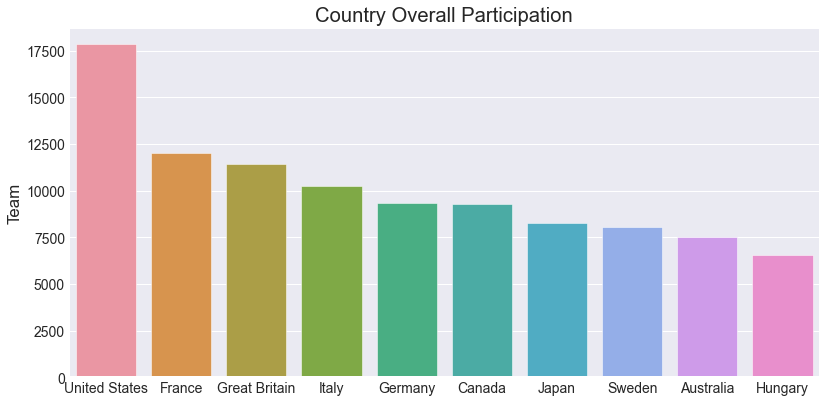

In [12]:
# Top 10 countries Barplot

plt.figure(figsize=(12,6))
plt.title('Country Overall Participation')
sns.barplot(x=Top_10_countries.index, y = Top_10_countries);

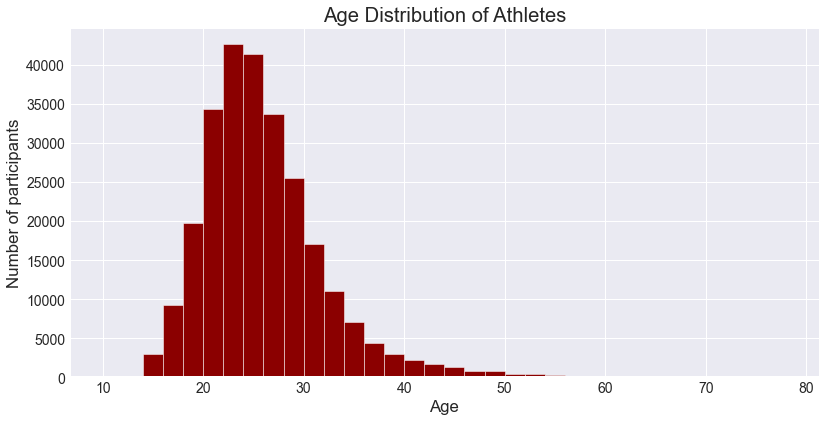

In [13]:
#Age Distribution
plt.figure(figsize=(12,6))
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes.Age, bins = np.arange(10,80,2),color = 'darkred', edgecolor = 'white')
plt.show()

In [14]:
#Winter Sports
winter_sports = athletes[athletes.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [15]:
#Summer Sports
summer_sports = athletes[athletes.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [16]:
#Number of Athletes
gender_counts = athletes.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

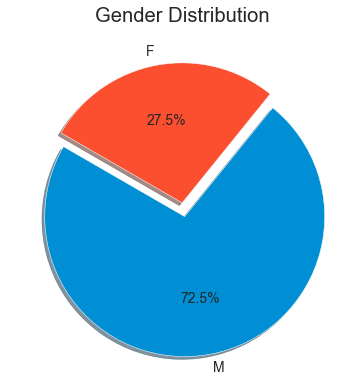

In [17]:
#Gender Distribution
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
explode = (0.1, 0)
plt.pie(gender_counts, explode = explode, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 150, shadow = True);

In [18]:
#Total no. of Medals
athletes.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [19]:
#Total no. of males in each olympics
male_participants = athletes[(athletes.Sex == 'M') & (athletes.Season == 'Summer')][['Sex', 'Year']]
male_participants = male_participants.groupby('Year').count().reset_index()
male_participants.tail()

,Year,Sex
24,2000,8390
25,2004,7897
26,2008,7786
27,2012,7105
28,2016,7465


In [20]:
male_olympics = athletes[(athletes.Sex == 'M') & (athletes.Season == 'Summer')]

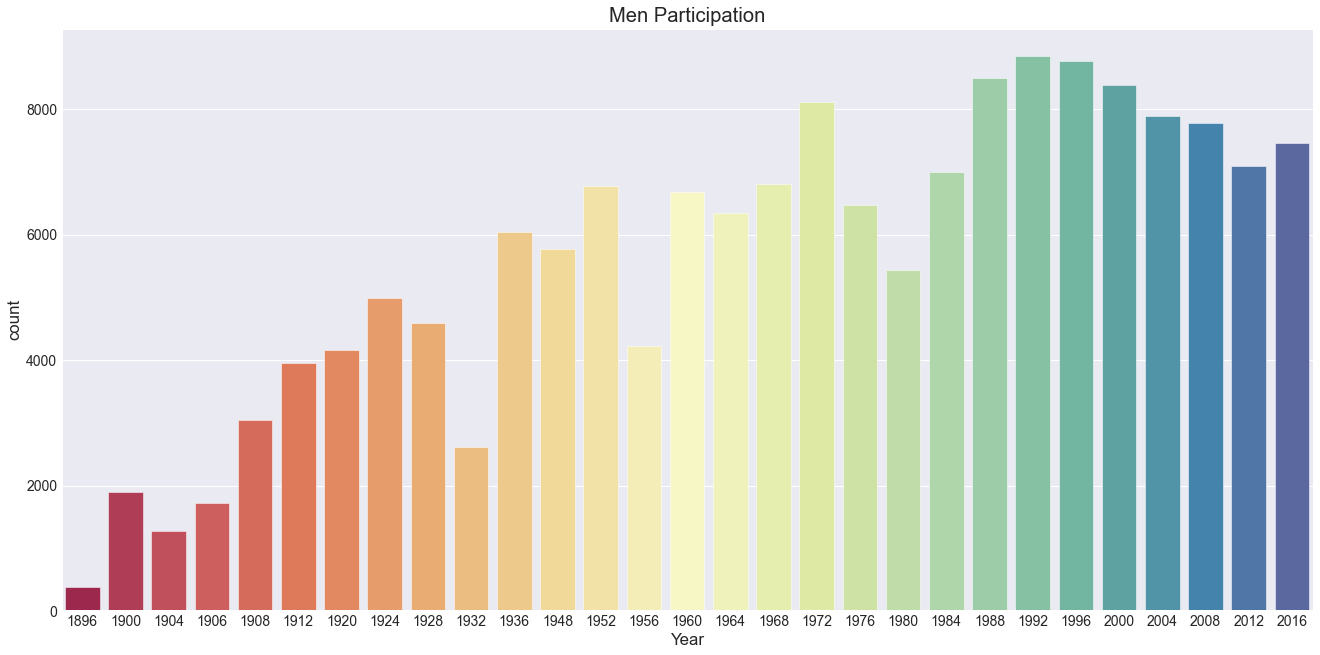

In [21]:
#Men Participation plot
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data = male_olympics, palette = 'Spectral')
plt.title('Men Participation')
plt.show()

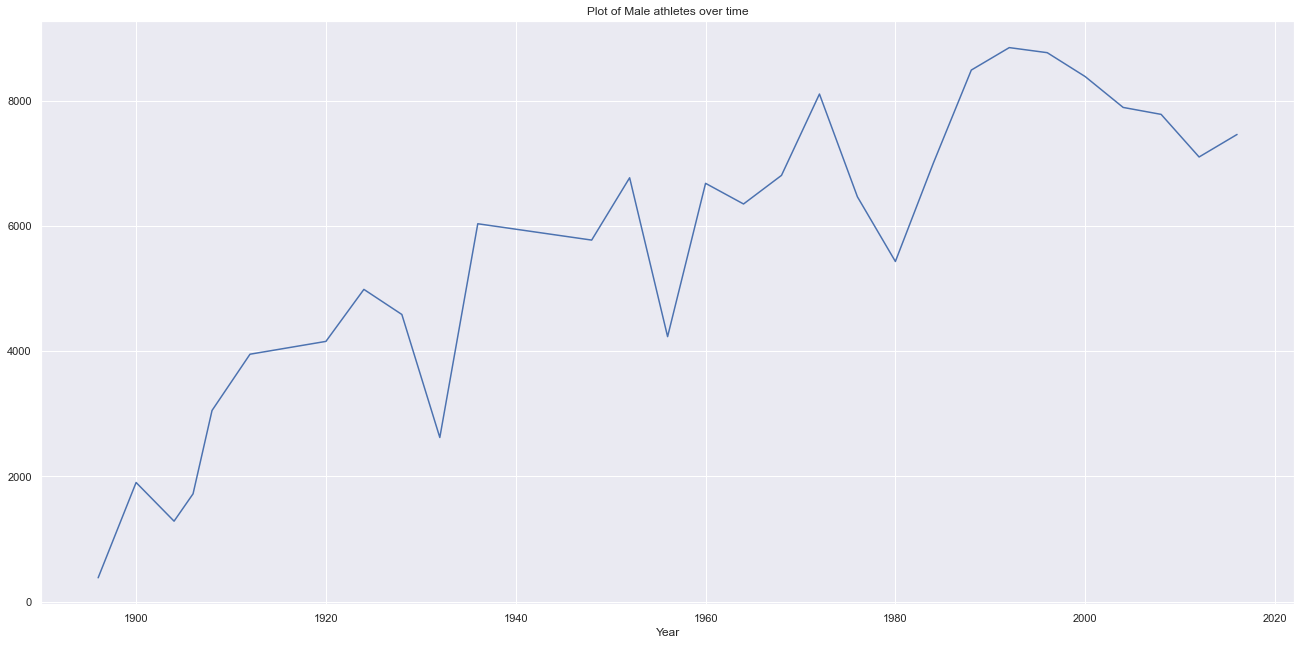

In [22]:
# line Graph
sns.set()
line = male_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
line.loc[:,'M'].plot()
plt.title('Plot of Male athletes over time')
plt.show()

In [23]:
#Total no. of females in each olympics
female_participants = athletes[(athletes.Sex == 'F') & (athletes.Season == 'Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()


,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [24]:
#Summer female participation
female_olympics = athletes[(athletes.Sex == 'F') & (athletes.Season == 'Summer')]

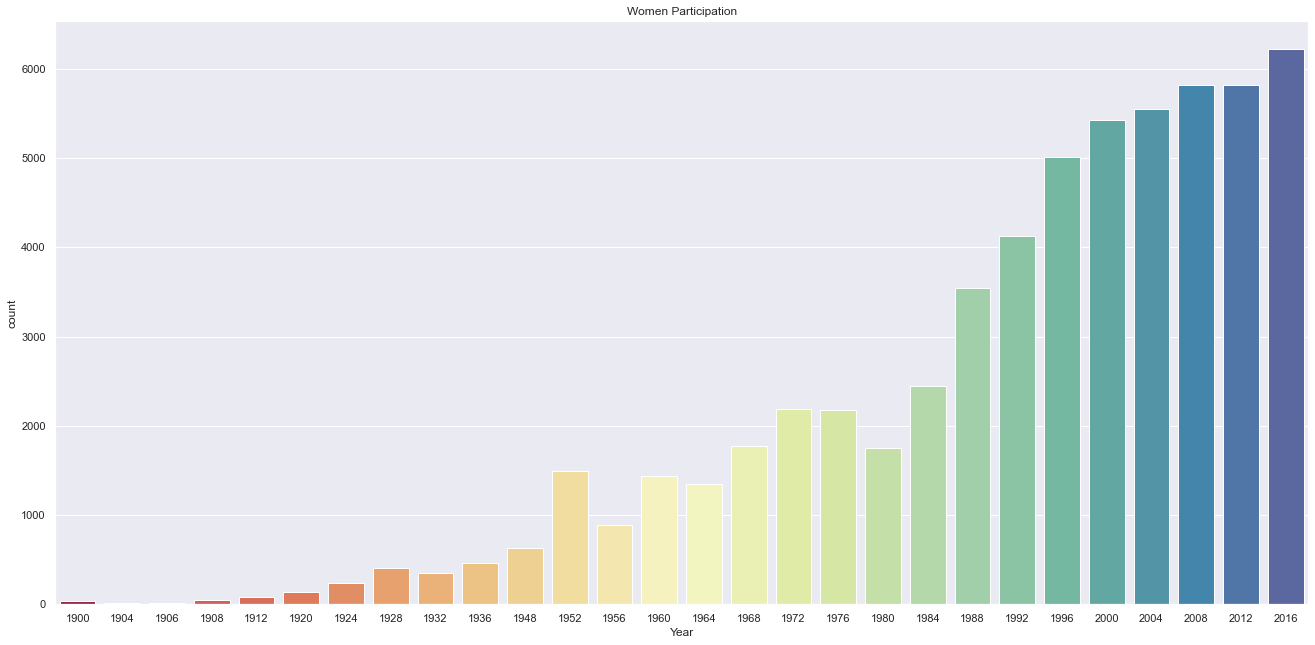

In [25]:
#Women participation barplot
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data = female_olympics, palette = 'Spectral')
plt.title('Women Participation')
plt.show()

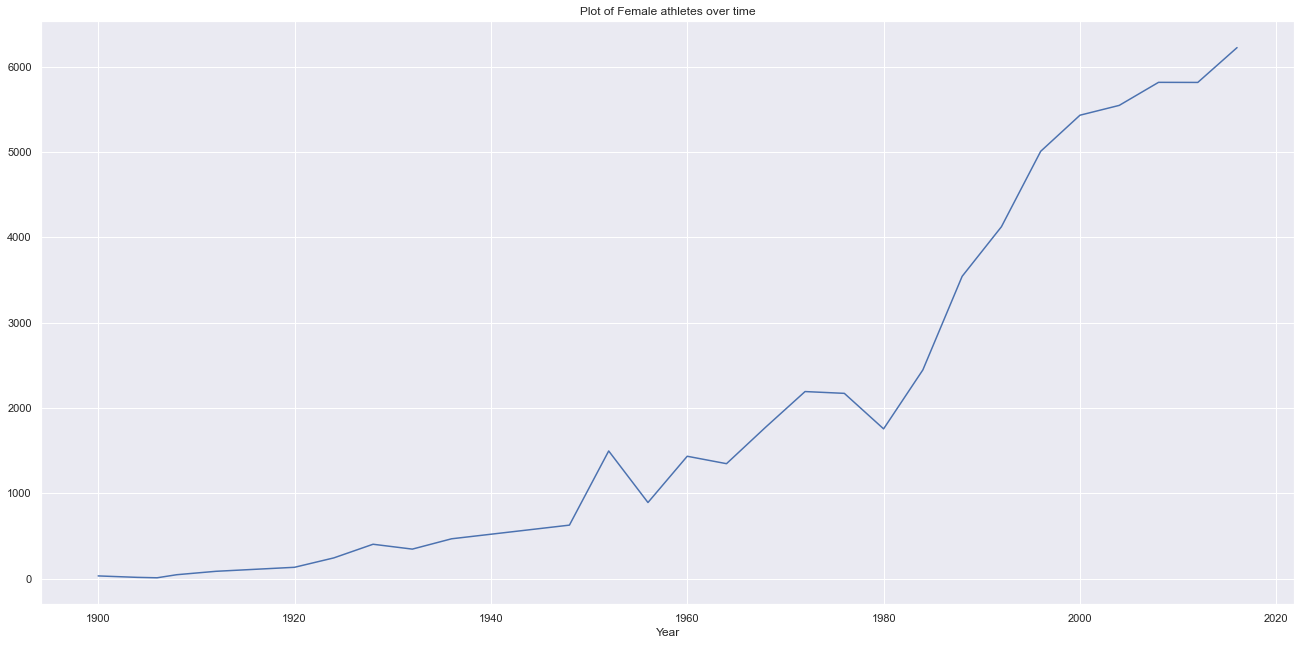

In [26]:
# line Graph
sns.set()
line = female_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
line.loc[:,'F'].plot()
plt.title('Plot of Female athletes over time')
plt.show()

In [27]:
# Gold Medalists
goldMedals = athletes[(athletes.Medal == 'Gold')]
goldMedals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [28]:
#Gold Medalists > 60 years based on ID
goldMedals['ID'][goldMedals['Age'] > 60].count()

6

In [29]:
#Gold Medalists > 60 years based on Sport
event = goldMedals['Sport'][goldMedals['Age']>60]
event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

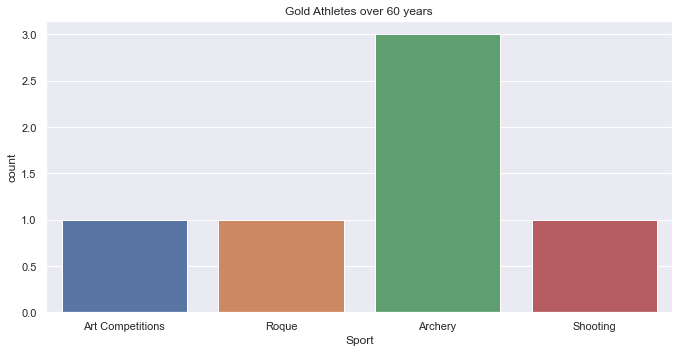

In [30]:
#Event Plot
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(event)
plt.title('Gold Athletes over 60 years')
plt.show()

In [31]:
#Gold Medalists from Teams
goldMedals.Team.value_counts().reset_index(name='Medal').head()

,index,Medal
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519


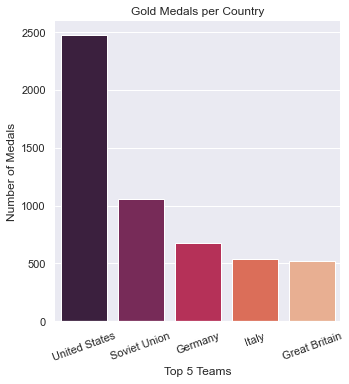

In [32]:
#Gold Medals per Country Plot
totalGoldMedals = goldMedals.Team.value_counts().reset_index(name='Medal').head()
g = sns.catplot(x = 'index', y = 'Medal', data = totalGoldMedals,
               height = 5, kind = 'bar', palette = 'rocket')
g.despine(left = True)
g.set_xlabels('Top 5 Teams')
g.set_ylabels('Number of Medals')
plt.xticks(rotation = 20)
plt.title('Gold Medals per Country')
plt.show()

In [33]:
#Rio Olympics Gold
max_year = athletes.Year.max()
print(max_year)
team_names = athletes[(athletes.Year == max_year) & (athletes.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

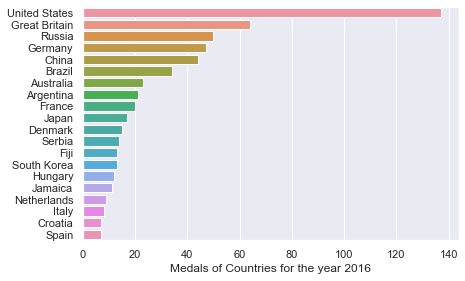

In [34]:
#Medals of Countries for the year 2016
sns.barplot(x = team_names.value_counts().head(20),
            y = team_names.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('Medals of Countries for the year 2016');

In [35]:
#FIltering notnull values
filter_nullMedals= athletes[(athletes['Height'].notnull()) &
                            (athletes['Weight'].notnull())]

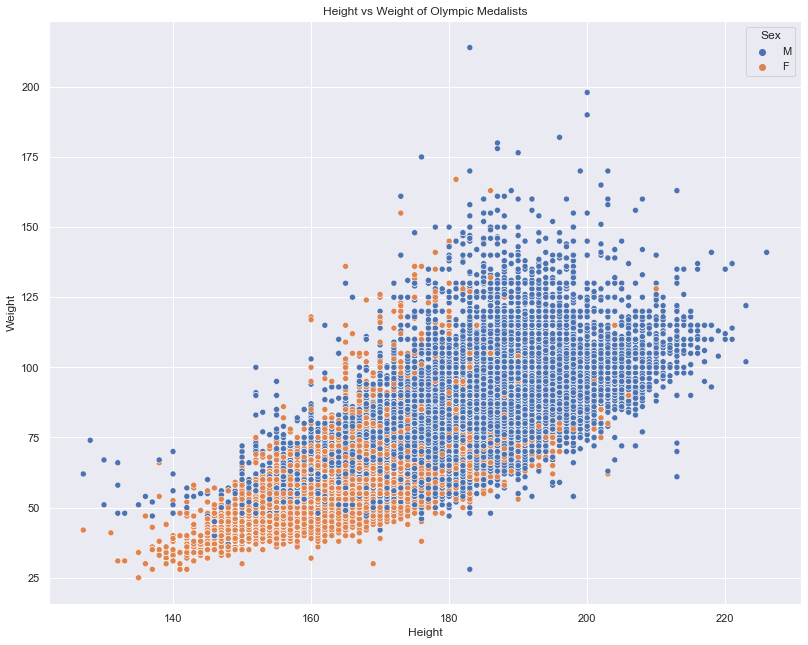

In [36]:
#Height vs Weight of Olympic Medalists Scatterplot
plt.figure(figsize = (12, 10))
axis = sns.scatterplot(x = 'Height', y = 'Weight', data = filter_nullMedals, hue = 'Sex')
plt.title('Height vs Weight of Olympic Medalists')
plt.show()